<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 1</h1>

-----

|**Maximum Marks**         |**100**
|--------------------------|--------
|  **Weight**              |  **15% of the Total Course Grade**
|  **Submission deadline** |  **6:00PM, Friday, April 2nd**
|  **Submission mode**     |  **Electronic, Using GitLab**
|  **Penalty**             |  **100% after the deadline**


## Learning Outcomes
The following learning outcomes apply to this piece:
- **LO3** - Demonstrate basic knowledge and understanding of descriptive and predictive data analysis methods, optimization and search, and knowledge representation.
- **LO4** - Formulate and extract descriptive and predictive statistics from data
- **LO5** - Analyse and interpret results from descriptive and predictive data analysis
- **LO6** - Apply their knowledge to a given problem domain and articulate potential data analysis problems


## Submission

You need to submit the following items:
- The notebook `Assignment-1.ipynb` with your solutions.
- A completed `statement-of-originality.md`, found in the root of the forked gitlab repo.

Submissions are performed by pushing to your forked GitLab assignment repository. For a refresher on forking and cloning repositories, please refer to `Lab 1`. Issues with your Git repo (with the exception of a CECS/ANU wide Gitlab failure) will not be considered as grounds for an extension. You will also need to add your details below. Any variation of this will result in a `zero mark`.

***** 

### Notes:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.
* Backup your assignment to your Gitlab repo often. 
* Extra reading and research will be required. Make sure you include all references in your Statement of Originality. If this does not occur, at best marks will be deduced. Otherwise, academic misconduct processes will be followed.
* For answers requiring free form written text, use the designated cells denoted by `YOUR WRITTEN ANSWER HERE` -- double click on the cell to write inside them.
* For all coding questions please write your code after the comment `YOUR CODE HERE`.
* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively. You are welcome to add additional cells to the final submission, provided they add value to the overall piece.
* You will be marked on the **correctness** and **readability** of your answers, including your code. If your marker can't understand your answer/code, then marks may be deducted. 
* Before submitting, restart the kernel in Jupiter Lab and re-run all cells before submitting your code. This will ensure the namespace has not kept any old variables, as these won't come across in submission and your code will not run. Without this, you could lose a significant number of marks.

*****

### Enter your Student ID below:

******
# Introduction

Video content is being produced, transported and consumed in more ways and by devices than ever. To facilitate this process, seamless interaction between video producing, transporting and consuming devices is required. The difference in avaliable resources, network bandwidth and video representation types between devices requires a mechanism for video content adaptation and translation. One such mechanism is video transcoding.


### So What is Video Transcoding?

Video transcoding (sometimes refered to as encoding) is the process of converting a video from one digital format to another. A format is defined by characteristics such as:

- Bit rate
- Frame rate
- Spatial resolution
- Coding syntax
- Content

One of the earliest applications of transcoding was to adapt the bit rate of a precompressed video stream to a channel bandwidth. For example, a TV program may be originally compressed at a high bit rate for studio applications, but later needs to be transmitted over a public channel at a much lower bit rate.


### So what are we doing with this?
Transcoding is a computationally demanding process and several methods has been proposed in order to increase its efficiency. Runtime scheduling of transcoding jobs in multicore and cloud environments is hard as resource requirements may not be known before hand. Currently, for video transcoding jobs, one has to rely on worst-case values which lead to an over provisioning of resources. This is due to the fact that the resource requirement of a transcoding job is highly dependent on the video data to be converted and its conversion parameters. In order to allow such distributed and multicore systems to overcome the problem of over provisioning, a method for predicting the resource requirement of each job is required.  If the scheduler can predict accurately how long each job would take to execute on a given platform, it can make an optimal decision, returning results faster, possibly minimizing energy, waiting time and maximizing throughput.


*****
## Data Description
The presented dataset (`transcoding_data.csv`) contains 23 columns which include input and output video characteristics, along with their transcoding time and memory resource requirements, while transcoding videos to different but valid formats. The dataset was collected based on experiments on an Intel i7-3720QM CPU through randomly picking output parameters of a video transcoding application. The attributes present in the dataset and their information are presented in the table below.

| Attribute |             Information            |   Attribute  |                  Information                 |
|:---------:|:----------------------------------:|:------------:|:--------------------------------------------:|
|     `id`    | Youtube Video ID                   |    `frames`    | Total Number of Frames in Video              |
|  `duration` | Duration of video in seconds       |     `size`     | Total Size of Video                          |
|  `bitrate`  | Video Bitrate                      |    `o_codec`   | Output Codec used for Transcoding            |
|   `height`  | Height of video in pixles          |   `o_bitrate`  | Output Bitrate used for Transcoding          |
|   `width`   | Width of video in pixels           |  `o_framerate` | Output Framerate used for Transcoding        |
| `framerate` | Number of Frames per Second        |    `o_width`   | Output Width in pixel used for Transcoding   |
|   `codec`   | Coding standard used for the video |   `o_height`   | Output Height used in pixel for Transcoding  |
|     `i`     | number of i frames in the video    | `o_resolution` | Output Resolution used for Transcoding       |
|     `p`     | number of p frames in the video    |     `umem`     | Total Codec Allocated Memory for Transcoding |
|     `b`     | number of b frames in the video    |     `utime`    | Total Process Time for Transcoding           |

**Note:** We have a sizable dataset to give you, so it is wise to consider your code in terms of complexity to ensure it doesn't take 30 minutes to run a single line. Any cells taking excessively long to run will result in a 0 grade for that sub question.
****

In [1]:
# Common Imports
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline
# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import additional modules here as required
# It is unlikely that you would need any additional modules. However, we had added space here just in case you feel 
# extras are required. Note that some justification as to WHY you are using them should be provided.
#
# Note that only modules in the standard Anaconda distribution are allowed. If you need to install it manually, it is not an accepted package.

****
## Q1: Loading and Processing the Data
Your first step in any data analysis and visualisation is to load the data and make it usable. Note how there are various columns that use text categories, and some categories missing data altogether. It would be wise to prepare the data to make it easier to work on.

This is an open-ended question, and marks will be awarded for logical processing of data.

**HINTS** -
* You might want to change the datatype of some columns to make them more useful from an analysis point-of-view.
* You might need to drop unnecessary or rededundant columns.
* You might need to rename some columns.

<span style= 'float: right;'><b>[5 marks]</b></span>

In [3]:
df = pd.read_csv("transcoding_data.csv") # Load the csv file of transcoding data into DataFrame.

df.dropna(inplace=True) # Remove missing values.
df.drop_duplicates(inplace=True) # Remove duplicate rows.
df.drop(df.loc[(df["url"].str.contains("ERROR"))|(df["url"].str.contains("WARNING"))].index, inplace=True) 
# Drop the row of which an "ERROR" or a "WARNING" occurrs in the "url" column.

df.drop(["url", "id", "category", "i", "p", "b", "width", "height", "o_width", "o_height"], axis=1, inplace=True) 
# Drop unnecessary columns "url", "id", and "category" that are useless for the data analysis of video transcoding.
# Drop unnecessary column "i", "p", and "b", since their sum "frames" is more effective for data analysis. 
# Drop redundant columns "width", "height", "o_width", and "o_height" that are included in resolution and o_resolution.

df = df.round(0) # Round all the floats in DataFrame.

columns_float = ["framerate", "frames", "size", "o_framerate", "umem", "utime"]
df[columns_float] = df[columns_float].applymap(np.int64) # Apply the int64 datatype to all float64 columns.

columns_reorder = ["duration", "frames", "size", "utime", "umem", 
                   "codec", "o_codec", "bitrate", "o_bitrate", 
                   "resolution", "o_resolution", "framerate", "o_framerate"] 
df = df[columns_reorder] # Reorder the columns to make input and output attributes adjacent.

rename_dict = {"utime": "time", "umem": "memory"}
df.rename(rename_dict, axis=1, inplace=True) # Rename "utime" and "umem" columns for better understanding.

In [4]:
df # Display the processed DataFrame

,duration,frames,size,time,memory,codec,o_codec,bitrate,o_bitrate,resolution,o_resolution,framerate,o_framerate
0,267,8002,2984742,166,172248,h264,mpeg4,373,5000000,568x320,480x360,30,15
1,267,8002,2592645,51,115356,flv1,flv1,324,242000,400x226,320x240,30,12
2,267,3204,272340,174,37827,mpeg4,flv1,85,5000000,176x144,640x480,12,24
3,31,744,938184,151,110003,h264,mpeg4,1261,820000,640x480,640x480,24,24
4,31,744,275280,278,77904,flv1,flv1,370,5000000,320x240,1920x1080,24,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4885,1711,51330,17554860,197,156446,flv1,flv1,342,820000,320x240,1920x1080,30,30
4886,1711,20532,1663092,216,114588,mpeg4,h264,81,5000000,176x144,1280x720,12,25
4887,2296,57400,60384800,246,281322,h264,h264,1052,109000,640x480,1920x1080,25,12
4888,2296,57400,68593000,205,331965,vp8,mpeg4,1195,3000000,640x480,480x360,25,24


******
## Q2: Exploratory Data Analysis

In this section you are expected to do an exploratory data analysis (EDA) on the dataset that you've just loaded and readied. EDA involves looking into any interesting features within the dataset. This could come in the form of relationships, anomalies or statistical trends. You are encouraged to start with a broad overview of the data and focus on specific aspects that seem like they could be of interest, even if they aren't! We want to see your process of data exploration using both **statistical** and **visual** methods here.

**HINTS** -

* If you have multiple graphs they should all be outputted as subplots under a single cell instead of each under their own cells. 
* Announce some descriptive stats on your data and explain what they mean in the context of this dataset.


<span style= 'float: right;'><b>[20 marks]</b></span>

In [5]:
# In this cell, I calculate the product results of video resolution and output resolution in each row 
# and put them in the columns of "resolution_product" and "o_resolution_product" to replace the columns
# "resolution" and "o_resolution", for the purpose of better conducting EDA.

df_product = df
df_product[["w", "h"]] = df_product["resolution"].str.split("x",expand=True).applymap(np.int64)
df_product[["ow", "oh"]] = df_product["o_resolution"].str.split("x",expand=True).applymap(np.int64)
df_product["resolution_product"] = df_product["w"] * df_product["h"]
df_product["o_resolution_product"] = df_product["ow"] * df_product["oh"]
df_product.drop(["w","h", "ow", "oh", "resolution", "o_resolution"], axis=1, inplace=True)
df_product.head()

,duration,frames,size,time,memory,codec,o_codec,bitrate,o_bitrate,framerate,o_framerate,resolution_product,o_resolution_product
0,267,8002,2984742,166,172248,h264,mpeg4,373,5000000,30,15,181760,172800
1,267,8002,2592645,51,115356,flv1,flv1,324,242000,30,12,90400,76800
2,267,3204,272340,174,37827,mpeg4,flv1,85,5000000,12,24,25344,307200
3,31,744,938184,151,110003,h264,mpeg4,1261,820000,24,24,307200,307200
4,31,744,275280,278,77904,flv1,flv1,370,5000000,24,30,76800,2073600


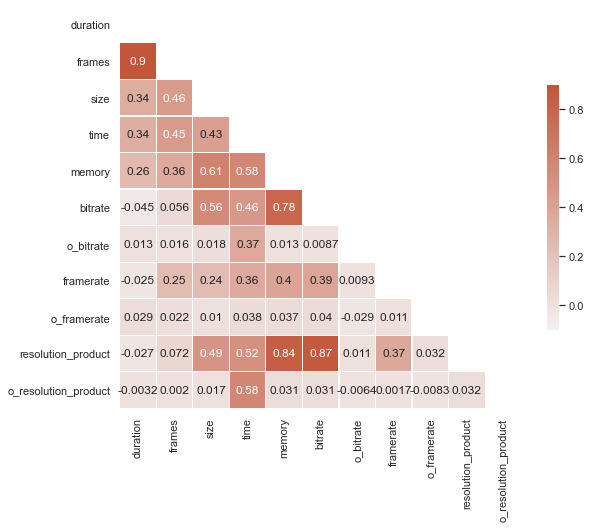

In [145]:
corr = df_product.corr() # Compute the correlation matrix.

mask = np.triu(np.ones_like(corr, dtype=bool)) # Generate a mask for the upper triangle.

f, ax = plt.subplots(figsize=(9, 9)) # Set up the matplotlib figure.

cmap = sns.diverging_palette(230, 20, as_cmap=True) # Generate a custom diverging colormap.

ax_heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-.1, vmax=.9, center=-.1, square=True, linewidths=.1,
                         annot=True, annot_kws={"size": 12}, cbar_kws={"shrink": .5}) # Draw the heatmap.

******
## Q3: Optimal Settings for Video Transcoding
In this section, you will be provided a question or statement that are you required to prove/disprove. You are expected to draw upon not only your visualisation skills, but also your hypothesis testing skills where required. You are also expected to provide code and written answers as required. Marks will be allocated based on the depth of your answer.

Don't forget to state any assumptions you make in the questions in order to clarify your argument.

<span style= 'float: right;'><b>[15 marks Total]</b></span>

### Q3.1: Is there a relationship between the transcoding parameters and the characteristics of the input video?

Note: The transcoding parameters mentioned here are **[o_codec, o_bitrate, o_framerate, o_resolution]** and the characteristics are **[duration, codec, bitrate, width, height, framerate, frames, i, p, b, size]** respectively.

<span style= 'float: right;'><b>[2 marks]</b></span>

In [6]:
# YOUR CODE HERE
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

### Q3.2: What are best settings to apply to the transcoding parameters so as to minimise the memory consumed by the transcoding process?

Note: The transcoding parameters mentioned here are **[o_codec, o_bitrate, o_framerate, o_resolution]**.

<span style= 'float: right;'><b>[4 marks]</b></span>

In [7]:
# YOUR CODE HERE
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

### Q3.3: Which transcoding parameters have the greatest impact on Process Time for Transcoding (`utime`)? List them in descending order of effect (most to least).
<span style= 'float: right;'><b>[4 marks]</b></span>

In [8]:
# YOUR CODE HERE
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

### Q3.4: Does the difference in the video's input and output resolution affect the Process Time for Transcoding (`utime`)? How does this resolution difference vary (if at all) in relation to the Output Resolution used for Transcoding (`o_resolution`)?

    
<span style= 'float: right;'><b>[5 marks]</b></span>

In [9]:
# YOUR CODE HERE
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

******
## Q4: Data Analysis
In this section, you will be provided a question or statement that are you required to prove/disprove. You are expected to draw upon not only your visualisation skills, but also your hypothesis testing skills where required. You are also expected to provide code and written answers as required. Marks will be allocated based on the depth of your answer.

Don't forget to state any assumptions you make in the questions in order to clarify your argument.

<span style= 'float: right;'><b>[40 marks Total]</b></span>

### Q4.1: Is there a relationship between the total number of frames in a video and the transcoding time for a given output resolution and codec?

Note there are a number of ways in which this can be done. However, due to the number of parameters available in the dataset, you can restrict the options for analysis (with justification), in order to reduce computational complexity.

<span style= 'float: right;'><b>[5 marks]</b></span>

In [10]:
# YOUR CODE HERE
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

### Q4.2: How does the resolution (width & height) of a video in the top 5 video categories vary with respect to the codec used and video category?

<span style= 'float: right;'><b>[10 marks]</b></span>

In [11]:
# YOUR CODE HERE
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

### Q4.3: Do videos with `flv1` codec transcode much faster than those with `h264` codec? Analyse the provided dataset and explain your findings.
<span style= 'float: right;'><b>[15 marks]</b></span>
**Hint:** A Hypothesis Test is a good way to assess a statement.

In [12]:
# YOUR CODE HERE
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

### Q4.4: This dataset is full of subtleties. Find two implicit relationships (not covered above) in the dataset and discuss how they could be used to better help with building a model to predict transcoding time and memory.
**Note:** Implicit is defined as "capable of being understood from something else though unexpressed" ([reference](https://www.merriam-webster.com/dictionary/implicit)).

**Hint:** Removing outliers makes it easier to detect implicit relations.

<span style= 'float: right;'><b>[10 marks]</b></span>

In [13]:
# YOUR CODE HERE
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

*****
## Q5: Linear Regression
Make use of the provided dataset to build a transcoding time prediction model and show the significance of the provided datasets.

Your task is as follows:
- Using a Linear Regression model, show how it could be possible (or impossible) to predict memory and cpu resources based on the variables provided in the dataset.

You are able to choose any variables in the dataset, except of course the base scores themselves. This means you can try to use indicators to predict the memory and cpu resources, or vice versa. After running your experiment, provide a written answer highlighting your results and the outcome of your work.

Marks will be provided for the quality of your response, and the evidence used to prove or disprove whether the memory and cpu resources can be generated with a trivial linear regression model.

<span style= 'float: right;'><b>[20 marks]</b></span>

In [14]:
# YOUR CODE HERE
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)